In [1]:
cd ..

/home/astro/phrdhx/automated_exocomet_hunt


In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import glob
import data
import os
from astropy.table import Table, unique
from analysis_tools_cython import *
from post_processing_tools import *
from tqdm import tqdm
pd.set_option('display.max_columns', None)

2686


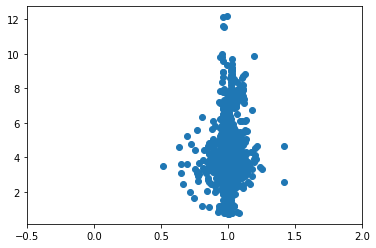

In [3]:
s6 = pd.read_csv('output_log_xrp/output_test_7_8.txt',sep=' ',header=None)
s6.columns = [
        "file",
        "tmag",
        "signal",
        "signal/noise",
        "time",
        "asym_score",
        "width1",
        "width2",
        "duration",
        "depth",
        "transit_prob",
    ]
s6 = s6[s6.transit_prob == 'maybeTransit']
plt.scatter(s6.asym_score,abs(s6['signal/noise']))
plt.xlim([-0.5,2])
print(len(s6))

(-0.5, 2.0)

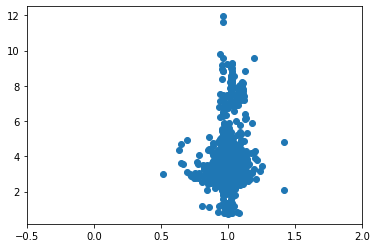

In [4]:
s6_onestep = pd.read_csv('output_log_xrp/output_test_7_8_onestep.txt',sep=' ',header=None)
s6_onestep.columns = [
        "file",
        "tmag",
        "signal",
        "signal/noise",
        "time",
        "asym_score",
        "width1",
        "width2",
        "duration",
        "depth",
        "transit_prob",
    ]
s6_onestep = s6_onestep[s6_onestep.transit_prob == 'maybeTransit']
plt.scatter(s6_onestep.asym_score,abs(s6_onestep['signal/noise']))
plt.xlim([-0.5,2])

In [5]:
s6_sample = s6.sample(50)
s6_sample_onestep = s6_onestep[s6_onestep.file.isin(s6_sample.file)]

In [6]:
s6_sample

,file,tmag,signal,signal/noise,time,asym_score,width1,width2,duration,depth,transit_prob
3707,tesslc_140578874.pkl,7.95200,-9.941436,-4.867835,1485.738906,0.984747,0.234935,0.030063,0.437498,-0.000679,maybeTransit
153,tesslc_55399084.pkl,7.50660,-5.323267,-2.939101,1486.823284,0.933730,0.005281,1.064908,0.791656,-0.000209,maybeTransit
3685,tesslc_158735962.pkl,7.10639,-7.753979,-4.610542,1482.224553,1.038179,0.057391,0.350486,0.458326,-0.000473,maybeTransit
3441,tesslc_279480875.pkl,7.92770,-4.743555,-3.354994,1475.907851,0.993657,0.318807,0.432343,0.791677,-0.000118,maybeTransit
2369,tesslc_434372574.pkl,7.59947,-3.765423,-3.095738,1483.620770,0.999087,0.089492,0.056451,0.270832,-0.000086,maybeTransit
540,tesslc_714517015.pkl,7.77090,-6.825576,-3.072160,1483.391506,1.014696,0.163692,0.017378,0.291667,-0.000595,maybeTransit
2778,tesslc_60174409.pkl,7.92050,-7.742550,-3.305600,1480.910867,0.966424,0.046649,0.037290,0.145834,-0.000866,maybeTransit
2568,tesslc_220431532.pkl,7.63140,-7.534762,-2.819141,1482.907420,1.007534,0.667047,0.354568,1.833302,-0.000233,maybeTransit
2818,tesslc_332975876.pkl,7.99100,-4.281970,-4.274894,1474.370009,0.996277,0.167950,0.121453,0.499991,-0.000083,maybeTransit
1497,tesslc_206850735.pkl,7.53213,-8.032119,-4.199984,1481.412335,1.021419,0.668422,0.013643,0.375001,-0.000473,maybeTransit


In [7]:
s6_sample_onestep

,file,tmag,signal,signal/noise,time,asym_score,width1,width2,duration,depth,transit_prob
116,tesslc_40805216.pkl,7.52300,-8.595529,-3.303277,1484.343728,1.007965,0.415724,0.057333,1.208327,-0.000897,maybeTransit
138,tesslc_55399084.pkl,7.50660,-5.323267,-2.939101,1486.823284,0.933730,0.005281,1.064908,0.791656,-0.000209,maybeTransit
148,tesslc_235067760.pkl,7.71020,-9.792827,-3.766118,1476.783866,1.025218,0.072011,0.020054,0.229165,-0.000403,maybeTransit
307,tesslc_382146252.pkl,7.73730,-9.960198,-3.387821,1474.137166,0.946106,0.097953,0.012716,0.187498,-0.000913,maybeTransit
409,tesslc_93415191.pkl,7.76260,-7.537868,-2.409775,1472.952703,0.980924,0.260151,0.200156,1.083319,-0.000594,maybeTransit
512,tesslc_235051321.pkl,7.07960,-5.594249,-2.551890,1486.741607,0.987163,0.093273,0.022946,0.187498,-0.000815,maybeTransit
516,tesslc_11809806.pkl,7.51602,-6.193168,-4.643921,1482.016105,1.075903,0.063702,0.009094,0.145832,-0.000431,maybeTransit
533,tesslc_714517015.pkl,7.77090,-6.825576,-3.072160,1483.391506,1.014696,0.163692,0.017378,0.291667,-0.000595,maybeTransit
627,tesslc_386422384.pkl,7.48810,-5.804765,-2.596645,1483.370775,1.000000,0.483044,0.655686,0.333338,-0.000438,maybeTransit
683,tesslc_100723561.pkl,7.16900,-8.243843,-3.279305,1487.743230,0.969659,0.188112,0.019472,0.333330,-0.000849,maybeTransit


### Calculations

In [8]:
s6_merge = pd.merge(s6,s6_onestep,on='file',suffixes=('_twostep','_onestep'))
s6_merge['delta_s'] = (s6_merge['signal/noise_twostep']) - (s6_merge['signal/noise_onestep'])
s6_merge['delta_asym'] = (abs(s6_merge.asym_score_twostep)) - (abs(s6_merge.asym_score_onestep))

print(s6_merge['delta_s'].unique())
print(s6_merge['delta_asym'].unique())

[ 0.         -0.18687908  0.19404947 ... -1.36937319 -0.34701182
 -3.25929132]
[0.]


In [9]:
s6_merge

,file,tmag_twostep,signal_twostep,signal/noise_twostep,time_twostep,asym_score_twostep,width1_twostep,width2_twostep,duration_twostep,depth_twostep,transit_prob_twostep,tmag_onestep,signal_onestep,signal/noise_onestep,time_onestep,asym_score_onestep,width1_onestep,width2_onestep,duration_onestep,depth_onestep,transit_prob_onestep,delta_s,delta_asym
0,tesslc_302270942.pkl,7.48997,-24.661110,-8.547252,1473.433247,1.027256,0.113796,0.012176,0.124997,-0.035513,maybeTransit,7.48997,-24.661110,-8.547252,1473.433247,1.027256,0.113796,0.012176,0.124997,-0.035513,maybeTransit,0.000000,0.0
1,tesslc_156428313.pkl,7.87180,-24.633497,-7.377485,1473.433157,1.101259,0.027317,0.080377,0.124998,-0.066399,maybeTransit,7.87180,-22.742157,-7.190606,1473.433157,1.101259,0.027317,0.080377,0.124998,-0.066399,maybeTransit,-0.186879,0.0
2,tesslc_229232825.pkl,7.60562,-21.727793,-7.472059,1473.433230,1.106895,0.020059,0.085020,0.124999,-0.004231,maybeTransit,7.60562,-21.727793,-7.472059,1473.433230,1.106895,0.020059,0.085020,0.124999,-0.004231,maybeTransit,0.000000,0.0
3,tesslc_307947474.pkl,7.77970,-9.456642,-3.356107,1481.495784,1.008486,0.245878,0.065827,0.562503,-0.001325,maybeTransit,7.77970,-7.476023,-3.550156,1481.495784,1.008486,0.245878,0.065827,0.541669,-0.001348,maybeTransit,0.194049,0.0
4,tesslc_279541004.pkl,7.81660,-5.188500,-4.371832,1481.474137,1.000693,0.170010,0.141719,0.583323,-0.000095,maybeTransit,7.81660,-5.188500,-4.371832,1481.474137,1.000693,0.170010,0.141719,0.583323,-0.000095,maybeTransit,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2681,tesslc_39844577.pkl,7.58002,-6.413155,-5.591748,1476.266069,1.006290,0.139473,0.070772,0.312497,-0.000147,maybeTransit,7.58002,-6.413155,-5.591748,1476.266069,1.006290,0.139473,0.070772,0.312497,-0.000147,maybeTransit,0.000000,0.0
2682,tesslc_231823975.pkl,7.35950,-7.027715,-3.410936,1482.845802,0.944329,0.699046,0.027556,1.520823,-0.000284,maybeTransit,7.35950,-7.027715,-3.410936,1482.845802,0.944329,0.699046,0.027556,1.520823,-0.000284,maybeTransit,0.000000,0.0
2683,tesslc_288151594.pkl,7.96898,-5.144607,-2.838487,1471.244646,0.921527,0.682055,0.779491,0.229168,-0.000314,maybeTransit,7.96898,-5.960196,-2.491476,1471.286313,0.921527,0.682055,0.779491,0.395835,-0.000237,maybeTransit,-0.347012,0.0
2684,tesslc_176516929.pkl,7.39660,-6.010445,-3.214889,1482.745259,1.030194,0.079290,0.535689,1.041650,-0.000216,maybeTransit,7.39660,-6.010445,-3.214889,1482.745259,1.030194,0.079290,0.535689,1.041650,-0.000216,maybeTransit,0.000000,0.0


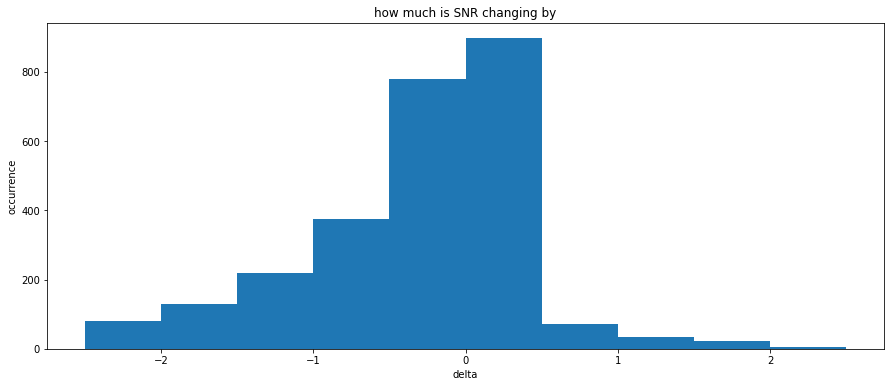

In [10]:
plt.figure(figsize=(15,6))
plt.hist(s6_merge.delta_s,range=(-2.5,2.5))
plt.ylabel('occurrence')
plt.xlabel('delta')
plt.title('how much is SNR changing by')
plt.show()

Note: Negative delta means the SNR increased in favour of the onestep

---

## Sample of 100

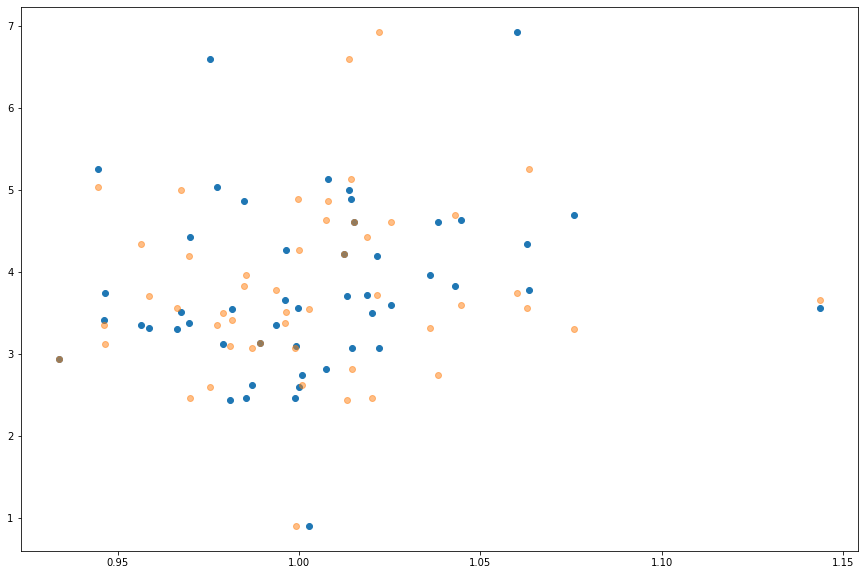

In [11]:
plt.figure(figsize=(15,10))
plt.scatter(s6_sample.asym_score,abs(s6_sample['signal/noise']))
plt.scatter(s6_sample_onestep.asym_score,abs(s6_sample['signal/noise']),alpha=0.5)
# plt.xlim([-0.5,1.5])

## Distribution of all lightcurves in magnitude directory

(-0.5, 1.5)

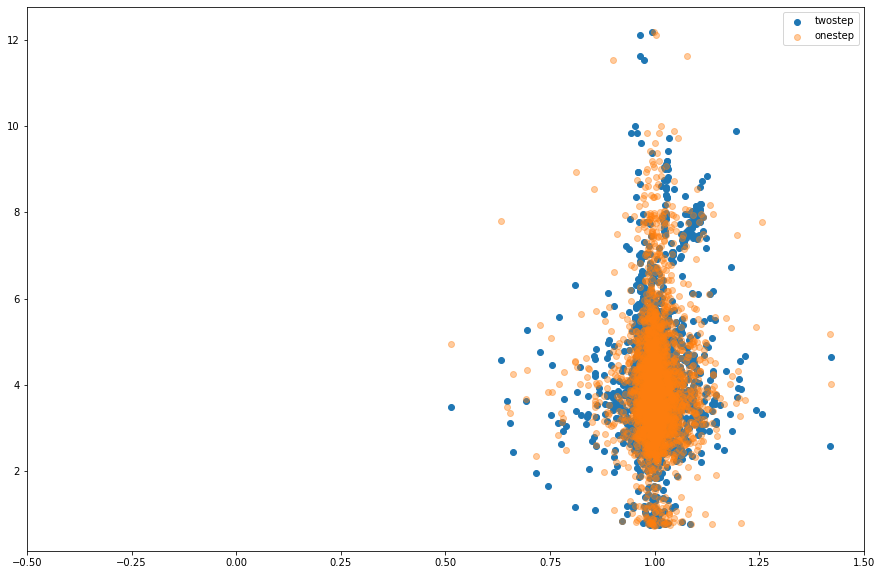

In [12]:
plt.figure(figsize=(15,10))
plt.scatter(s6.asym_score,abs(s6['signal/noise']),label='twostep')
plt.scatter(s6_onestep.asym_score,abs(s6['signal/noise']),alpha=0.4,label='onestep')
plt.legend()
plt.xlim([-0.5,1.5])

NameError: name 'df' is not defined

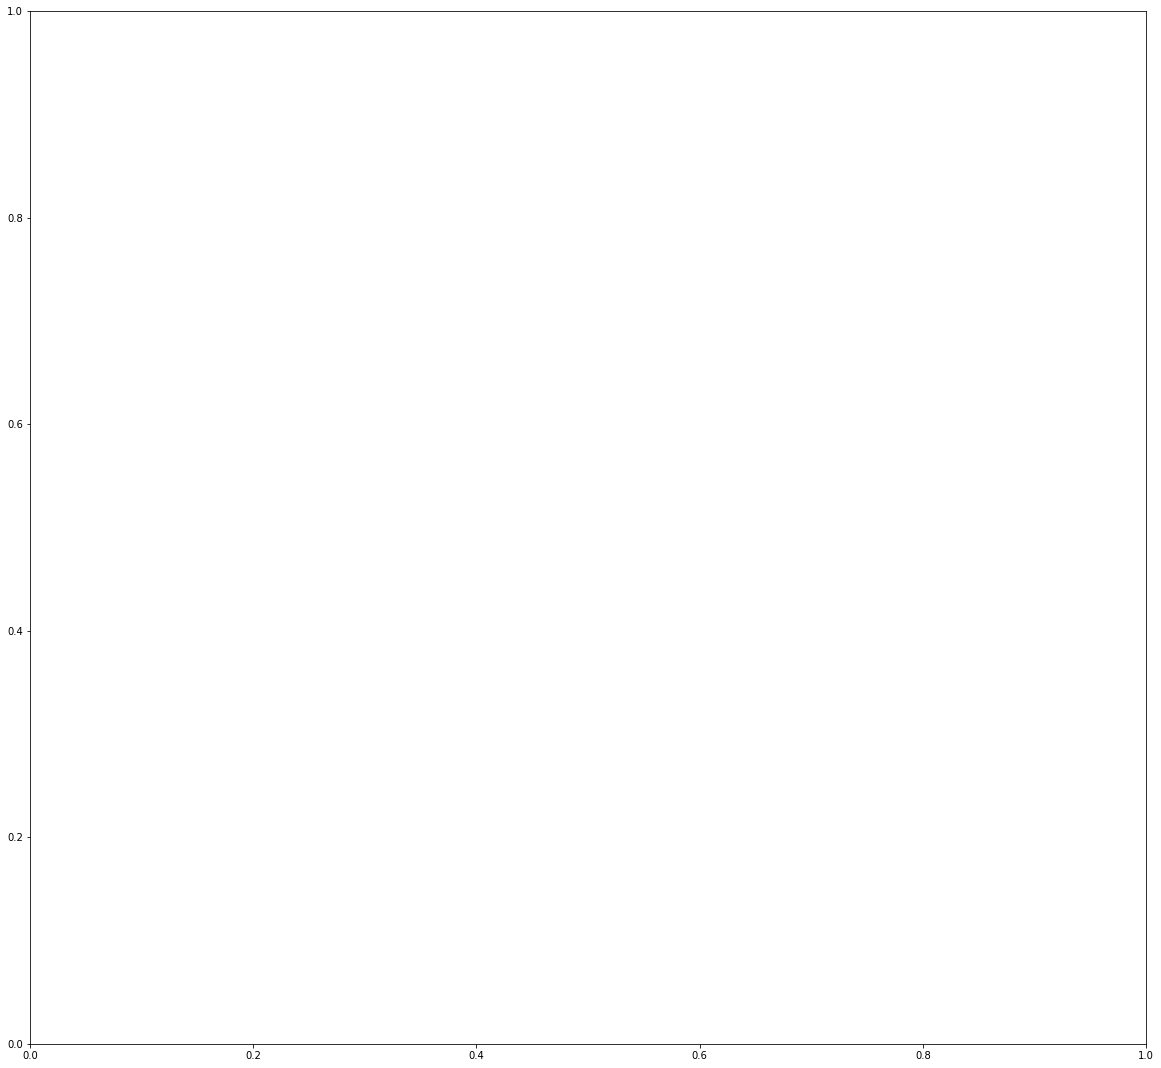

In [13]:
fig,ax = plt.subplots(figsize=(20,19))
ax.scatter(df.asym_score,abs(df['signal/noise']),s=30)
ax.scatter(df2.asym_score,abs(df2['signal/noise']),color='orange',alpha=0.5)
ax.set_ylim([5,9])
ax.set_xlim([0.9,1.1])
ax.set_xlabel('asymmetry')
ax.set_ylabel('signal to noise')
for idx, row in df.iterrows():
    ax.annotate(row['file'].split('_')[1].split('.pkl')[0], (row['asym_score'], abs(row['signal/noise'])),fontsize=8)
for idx, row in df2.iterrows():
    ax.annotate(row['file'].split('_')[1].split('.pkl')[0], (row['asym_score'], abs(row['signal/noise'])),fontsize=8)
plt.show()
fig.savefig('s6_tmag_7_8.png')